Using Transfer learing and Tensorflow to classify different dig breeds


We are going to go through the following TensorFlow/Deep learning worlflow:


1. Getting thr data ready
2. Prepare the data
3. choose and fit/train a model
4. Evaluating the model
5. Improve the model through experimentation
6. save , share and reload the model

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.2.0-rc4


In [0]:
import tensorflow as tf
import tensorflow_hub as hub

print('Tensorflow version:' , tf.__version__)
print('Tensorflow hub version:' , hub.__version__)

# check for GPU
print('GPU', 'available yes!!!!!'   if tf.config.list_physical_devices('GPU') else 'NOt available')
#print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

Tensorflow version: 2.2.0-rc4
Tensorflow hub version: 0.8.0
GPU available yes!!!!!


# Getting the data ready

In [0]:
# running this cell provide to link your google drive with this notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# this is to unzip the data file (containing the traiing and test data)
#!unzip 'drive/My Drive/Dog Vision/dog-breed-identification.zip' -d 'drive/My Drive/Data/'

# ***Accessing the data*** 
------------



In [0]:
# check out the lables of our data

import pandas as pd

labels_csv=pd.read_csv("drive/My Drive/Data/dog-breed-identification/labels.csv")


In [0]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [0]:
len(labels_csv)

10222

In [0]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

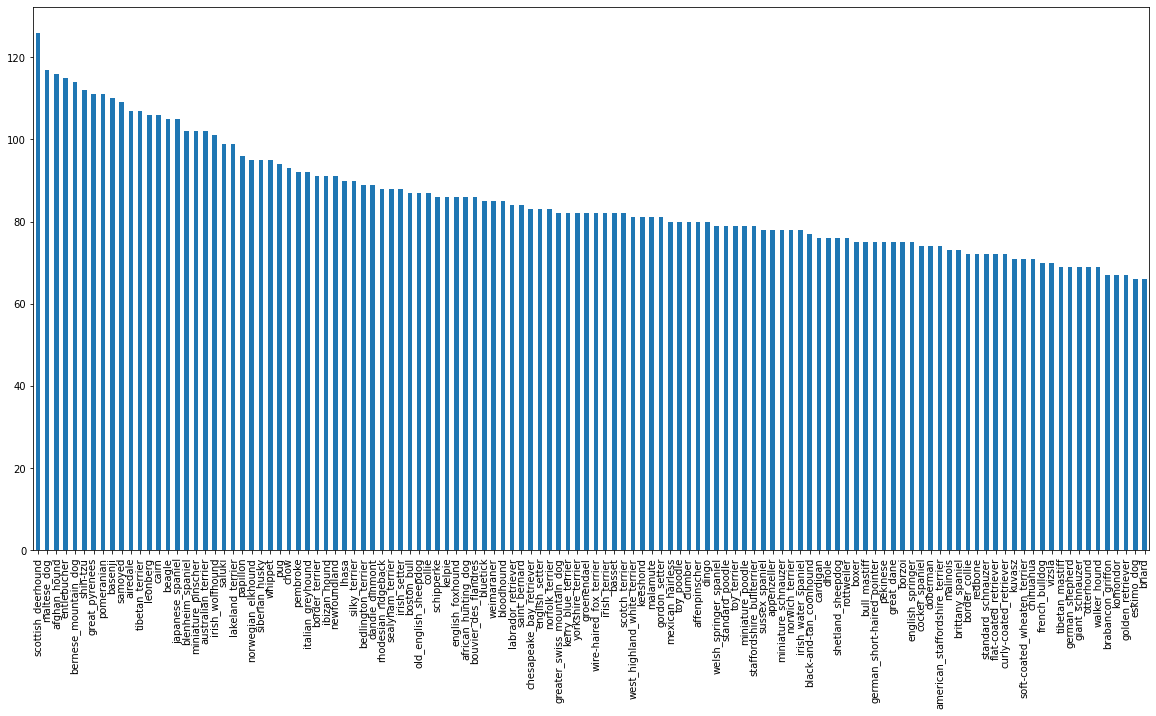

In [0]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [0]:
from IPython.display import display , Image 
Image('drive/My Drive/Data/dog-breed-identification/000bec180eb18c7604dcecc8fe0dba07.jpg')

## ***Getting images and there labels***

In [0]:
filenames = ['drive/My Drive/Data/dog-breed-identification/train/' + fname + '.jpg' for fname in labels_csv['id']]

In [0]:
len(filenames)

10222

In [0]:
filenames[10]

'drive/My Drive/Data/dog-breed-identification/train/004396df1acd0f1247b740ca2b14616e.jpg'

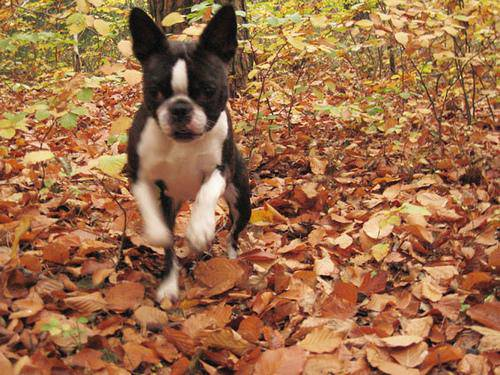

In [0]:
Image(filenames[0])

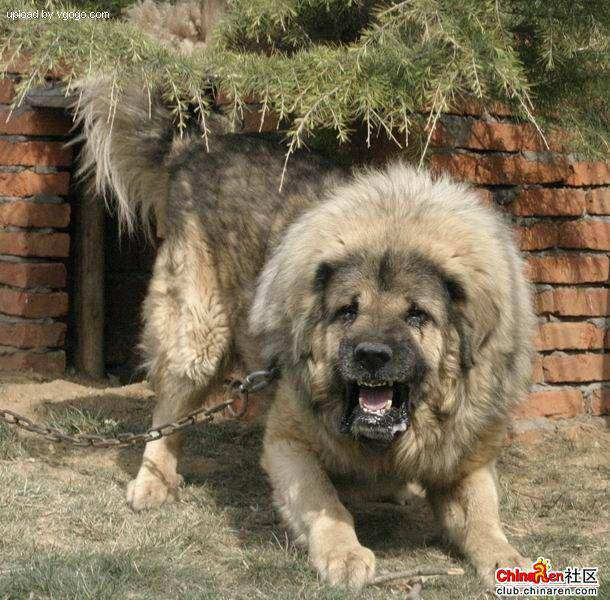

In [0]:
Image(filenames[9000])

In [0]:
# check whether number of filenames matched with actual images

import os

if len(os.listdir('drive/My Drive/Data/dog-breed-identification/train')) == len(filenames):
  print('filenames matches with actual data')
else:
  print('filenames doesnt match with actual image data!!!')

filenames matches with actual data


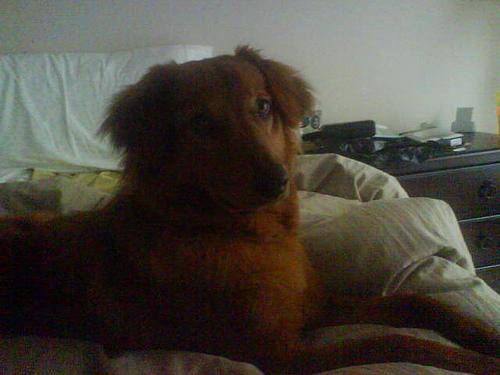

In [0]:
Image(filenames[1000])

In [0]:
import numpy as np

labels=np.array(labels_csv['breed'])
labels[:10] , len(labels)

(array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
        'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
        'scottish_deerhound'], dtype=object), 10222)

In [0]:
# see if number of labels matched with filenames

if len(labels) == len(filenames):
  print('Number of labels matches with filenames')

else:
  print('lables **doesnt** matches with filenames ')

Number of labels matches with filenames


In [0]:
unique_breeds = np.unique(labels)

In [0]:
len(unique_breeds)

120

In [0]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [0]:
# Turn on label into an array of boolean
print(labels[100])
labels[100] == unique_breeds

rhodesian_ridgeback


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
# Turn every labels into a boolean

print(labels[200])
labels[200] == unique_breeds

greater_swiss_mountain_dog


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
boolean_labels = [ label == np.array(unique_breeds) for label in labels]


In [0]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
# Example: Turing a boolean array into integers

print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0])
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# creating our own validation set

In [0]:
x = filenames
y = boolean_labels

lets start experimenting with 1000 images

In [0]:
# set number of images to use for experimenting

NUM_IMAGES = 1000 #@param {type:'slider', min : 1000 , max:10000 , step:1000}
NUM_IMAGES

1000

In [0]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

x_train , x_val , y_train , y_val  = train_test_split( x[:NUM_IMAGES] , y[:NUM_IMAGES] , test_size=0.2)

len(x_train) , len(x_val) , len(y_train) , len(y_val)

(800, 200, 800, 200)

In [0]:
# check out the training data

x_train[:5] , y_train[:5]

(['drive/My Drive/Data/dog-breed-identification/train/10ce268c0affd428a49ada5a79fe9ca8.jpg',
  'drive/My Drive/Data/dog-breed-identification/train/0c0fb87fb13f0f6c8d21ff6c15e3361e.jpg',
  'drive/My Drive/Data/dog-breed-identification/train/080073330bb8954505340cf18159fbb8.jpg',
  'drive/My Drive/Data/dog-breed-identification/train/181e91cb6caf6739478d06231faa053d.jpg',
  'drive/My Drive/Data/dog-breed-identification/train/141706c74486585c27de2dfb335695bb.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, 

# Preprocessing images ( Turing images into tensors )

In [0]:
# convert an image to a numpy array

from matplotlib.pyplot import imread 

image = imread(filenames[42])
image.shape

(257, 350, 3)

In [0]:
# now convert an ndarray to tensors

tf.constant(image[:2])

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [0]:
# a function to process image (from image to tensors)

IMG_SIZE = 224 

def process_image(image_path):
  """
  Take an image file path and convert it into tensors
  """
  
  image = tf.io.read_file(image_path)

  image =  tf.image.decode_jpeg(image , channels=3)

  image = tf.image.convert_image_dtype(image , tf.float32)

  image = tf.image.resize(image , size=[IMG_SIZE , IMG_SIZE])

  return image

# create data batches

In [0]:
# create a sample function to return a **tuple** (`image` `label`)

def get_image_label(image_path , label):

  image = process_image(image_path)
  return image , label


In [0]:
# Define the batch size , 32 is good default

BATCH_SIZE = 32

# create a function to turn data into batches
def create_data_batches(x , y=None , batch_size= BATCH_SIZE , valid_data = False , test_data = False):
  
  if test_data:
    print('creating test data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print('creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print('creating training data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))

    data = data.shuffle(buffer_size = len(x))

    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [0]:
# creating training and validation data batches
train_data = create_data_batches(x_train , y_train)
val_data = create_data_batches(x_val , y_val , valid_data=True)

creating training data batches...
creating validation data batches...


In [0]:
# check out the different attributes of our data batches

train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#visualizeing the data batches

In [0]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

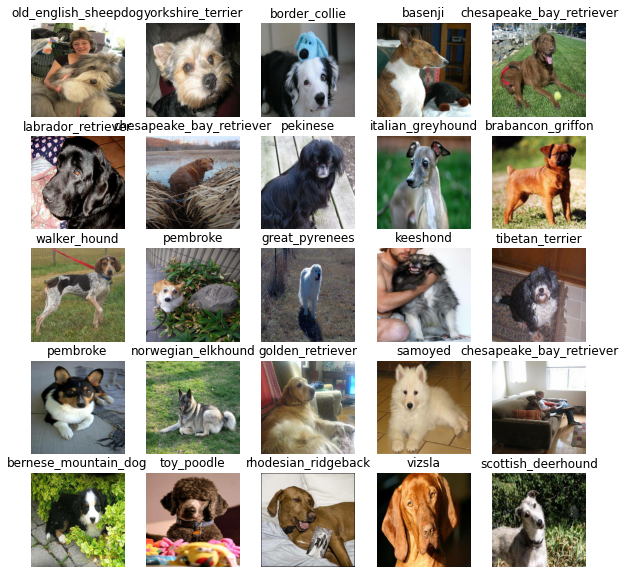

In [0]:
# Visualize training images from the training data batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

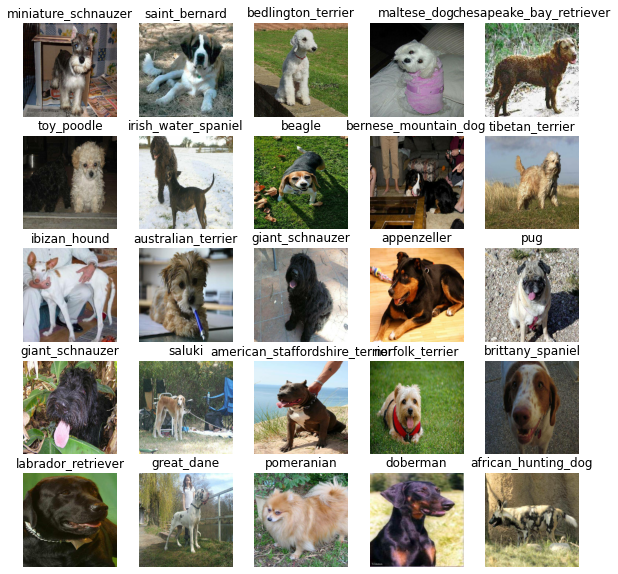

In [0]:
# show images for validation set

val_images , val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images , val_labels)

# creating and training a model

Building a model

In [0]:
# setup imput shape for the model
INPUT_SHAPE = [ None , IMG_SIZE , IMG_SIZE , 3]

#setup output shape for the model
OUTPUT_SHAPE = len(unique_breeds)

#setup URL for tensor flow  hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
INPUT_SHAPE

[None, 224, 224, 3]

In [0]:
# create a fucntion which builds the keras model

def create_model(input_shape = INPUT_SHAPE , output_shape = OUTPUT_SHAPE , model_url = MODEL_URL):
  print('Building model with :' , MODEL_URL)

  #SETUP THE model layers
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL), tf.keras.layers.Dense(units = OUTPUT_SHAPE , activation='softmax')])

  #compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )

  # Build the model

  model.build(INPUT_SHAPE)
  return model
  

In [0]:
model = create_model()
model.summary()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# creating callbacks

## TensorBoard callback

In [0]:
# load tensorboard notebook extension
%load_ext tensorboard

In [0]:
import datetime


# create a fucntion to build a tensorboard callback

def create_tensorboard_callback():

  logdir = os.path.join('drive/My Drive/Dog Vision/logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

  return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping callback

it prevents our model from overfitting by stop training it

In [0]:
# create an early stopping callback

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 3)

## Training a model (on subset of data)

It is to train on 1000 images to make sure everything is working

In [0]:
NUM_EPOCHS = 100 #@param {type:'slider' , min:10 , max:100 , step:10}

In [0]:
# check to make sure that we are still running on a GPU

print('GPU' , 'availabel YESSSS!!!' if tf.config.list_physical_devices('GPU') else 'not availabel')

GPU availabel YESSSS!!!


In [0]:
# build a fucntion to train a model 

def train_model():

  model = create_model()

  tensorboard = create_tensorboard_callback()

  model.fit(x=train_data , epochs= NUM_EPOCHS , validation_data=val_data , validation_freq= 1 , callbacks=[tensorboard , early_stopping])

  return model

In [0]:
# fit the model to the traine data
#model = train_model()

# checking the tensorboard logs

In [0]:
#%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

# Making and evaluating predictions using a trained model

In [0]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# make prediction on validation data ( not used to train on)

predictions = model.predict(val_data , verbose=1)
predictions

7/7 [==============================] - 145s 21s/step


array([[2.05740891e-02, 2.26803776e-03, 1.70824192e-02, ...,
        4.38381173e-02, 2.03875126e-03, 1.56083668e-03],
       [3.29297571e-03, 5.22792863e-04, 9.45676467e-04, ...,
        1.46547761e-02, 2.04549525e-02, 5.30214049e-03],
       [1.18400492e-02, 8.72155838e-03, 7.43539445e-03, ...,
        7.20624300e-03, 5.43173519e-04, 4.53347387e-03],
       ...,
       [1.88624894e-03, 7.65556120e-04, 1.97901577e-03, ...,
        2.16810760e-04, 9.76113416e-03, 1.11405121e-03],
       [1.31484019e-02, 1.16522971e-03, 3.21942731e-03, ...,
        7.30934460e-03, 4.01982106e-02, 6.68915571e-04],
       [1.56044392e-02, 1.42476475e-03, 7.41689582e-05, ...,
        5.38760214e-05, 1.38960965e-02, 5.98181097e-04]], dtype=float32)

In [0]:
predictions[0]

array([2.05740891e-02, 2.26803776e-03, 1.70824192e-02, 1.59262202e-03,
       3.33982357e-03, 1.76445674e-02, 3.61624709e-03, 1.07127037e-02,
       6.20021299e-03, 1.41062960e-02, 7.43579760e-04, 9.87322908e-03,
       3.91623750e-03, 9.36460868e-03, 1.12593789e-02, 3.46126081e-03,
       2.38483003e-03, 3.48278023e-02, 8.27376917e-03, 1.50011468e-03,
       3.43257673e-02, 2.44904421e-02, 1.88950356e-03, 1.50356572e-02,
       7.22654629e-03, 4.99086268e-03, 7.66729331e-03, 2.99414620e-03,
       2.42440738e-02, 7.28850282e-05, 3.54166422e-03, 1.42626632e-02,
       6.31049275e-03, 3.34525644e-03, 3.55501031e-03, 1.63122769e-02,
       1.47149095e-03, 4.58456483e-03, 8.51108227e-04, 8.55497830e-03,
       4.14919527e-03, 1.08798826e-02, 9.95201245e-03, 3.07810702e-03,
       5.85622434e-03, 1.02135213e-03, 9.07457061e-03, 2.13097339e-03,
       4.49628336e-04, 3.01027717e-03, 3.59748839e-03, 3.62990201e-02,
       4.36105346e-03, 9.45566222e-04, 3.99865070e-03, 6.64071366e-03,
      

In [0]:
# first prediction
index = 42
print(predictions[index])
print('max value (probability of prediction)' , np.max(predictions[index]))
print('sum:' , np.sum(predictions[index]))
print('max index: ' , np.argmax(predictions[index]))
print('predicted labels: ' , unique_breeds[np.argmax(predictions[index])])

[1.5408433e-02 2.3395746e-04 6.6976584e-02 6.7713461e-04 1.6491599e-02
 4.2601842e-03 5.2080504e-03 2.0069915e-03 3.9802953e-03 1.0477445e-02
 2.1797155e-03 7.8453682e-03 1.5539950e-02 1.2269500e-03 1.2830642e-02
 1.8761052e-02 2.8015373e-03 1.1648079e-03 3.2440573e-03 9.4853807e-04
 2.5697174e-03 1.9567329e-03 1.6827130e-03 1.1431840e-03 4.1235026e-02
 2.6940770e-02 9.0419920e-03 2.1778531e-03 9.7425375e-03 7.2552997e-04
 2.2698782e-02 1.3457269e-04 7.5736498e-05 1.0072135e-03 1.4670426e-03
 1.5554340e-02 9.2606485e-02 4.1708976e-04 2.2742152e-02 1.5437446e-03
 7.1438035e-04 7.6971776e-03 4.1923509e-03 3.1732765e-03 3.7657839e-04
 1.0707446e-03 1.0592990e-03 5.8706244e-03 2.3314951e-04 6.1314716e-04
 4.0600773e-02 1.9231107e-02 1.0730110e-03 4.1021635e-03 1.3314543e-03
 2.7009440e-03 5.0356954e-02 2.4313896e-03 1.7209165e-02 9.9667646e-03
 2.5714952e-02 2.7406774e-03 6.0054222e-03 6.0305570e-04 2.7472204e-02
 6.9210017e-03 3.0485664e-03 2.1349415e-03 5.8962210e-05 9.8562299e-04
 5.267

In [0]:
unique_breeds[29]

'chihuahua'

In [0]:
# turn prediction probabilities into their respective label ( easier to understand )

def get_pred_label(prediction_probabilities):

  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label



'maltese_dog'

In [0]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# create a fucntion to unbatch a batch dataset

def unbatchify(data):

  images = []
  labels = []

  for image , label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images , labels

val_images , val_labels = unbatchify(val_data)
val_images[0] , val_labels[0]

(array([[[0.08032143, 0.06946708, 0.07338866],
         [0.6177802 , 0.6165897 , 0.6105323 ],
         [0.05855922, 0.04521888, 0.01893852],
         ...,
         [0.25461388, 0.2310845 , 0.2310845 ],
         [0.2409634 , 0.2376371 , 0.22979397],
         [0.20273955, 0.20192525, 0.19408211]],
 
        [[0.05953991, 0.04868557, 0.05260714],
         [0.50224674, 0.5016449 , 0.49507308],
         [0.03474972, 0.02140586, 0.00348047],
         ...,
         [0.25207633, 0.2285469 , 0.2285469 ],
         [0.21285719, 0.19886254, 0.19438948],
         [0.2434503 , 0.23217663, 0.22679318]],
 
        [[0.05889997, 0.04804562, 0.05196719],
         [0.39864296, 0.39786038, 0.39886352],
         [0.02538222, 0.01172675, 0.00321529],
         ...,
         [0.25050467, 0.22966257, 0.22160059],
         [0.20726216, 0.18679479, 0.17854546],
         [0.27821386, 0.25335288, 0.24647257]],
 
        ...,
 
        [[0.4689106 , 0.4571459 , 0.42185178],
         [0.52996   , 0.5181953 , 0.48290

In [0]:
# a function to visualise the pred_probabilities

def plot_pred(prediction_probabilities , labels , images , n=1):

  pred_prob , true_label , image = prediction_probabilities[n] , labels[n] , images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color= 'green'
  else:
    color = 'red'

  plt.title('{} {:2.0f}% {}'.format(pred_label , np.max(pred_prob)*100, true_label), color = color)

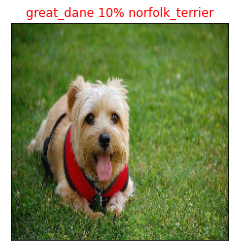

In [0]:

plot_pred(prediction_probabilities=predictions, labels=val_labels , images = val_images , n= 18)
  


In [0]:
# create a fucntion to get top 10 predictions labels

def plot_pred_conf(prediction_probabilities , labels , n=1):
  
  pred_prob , true_label = prediction_probabilities[n] , labels[n]
  
  pred_label = get_pred_label(pred_prob)

  # find the top 10 prediction confidences indexes

  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  top_10_pred_values = pred_prob[top_10_pred_indexes]

  top_10_pred_labels = unique_breeds[top_10_pred_indexes]


  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), top_10_pred_values , color ='grey')

  plt.xticks(np.arange(len(top_10_pred_labels)), labels = top_10_pred_labels , rotation='vertical')

  if(np.isin(true_label , top_10_pred_labels)):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass


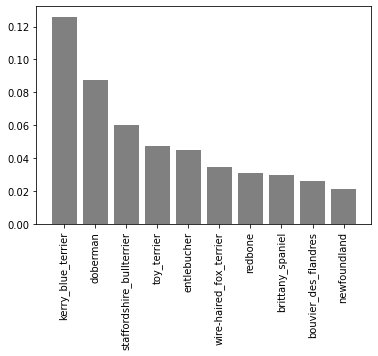

In [0]:
plot_pred_conf(prediction_probabilities= predictions , labels = val_labels , n=99)


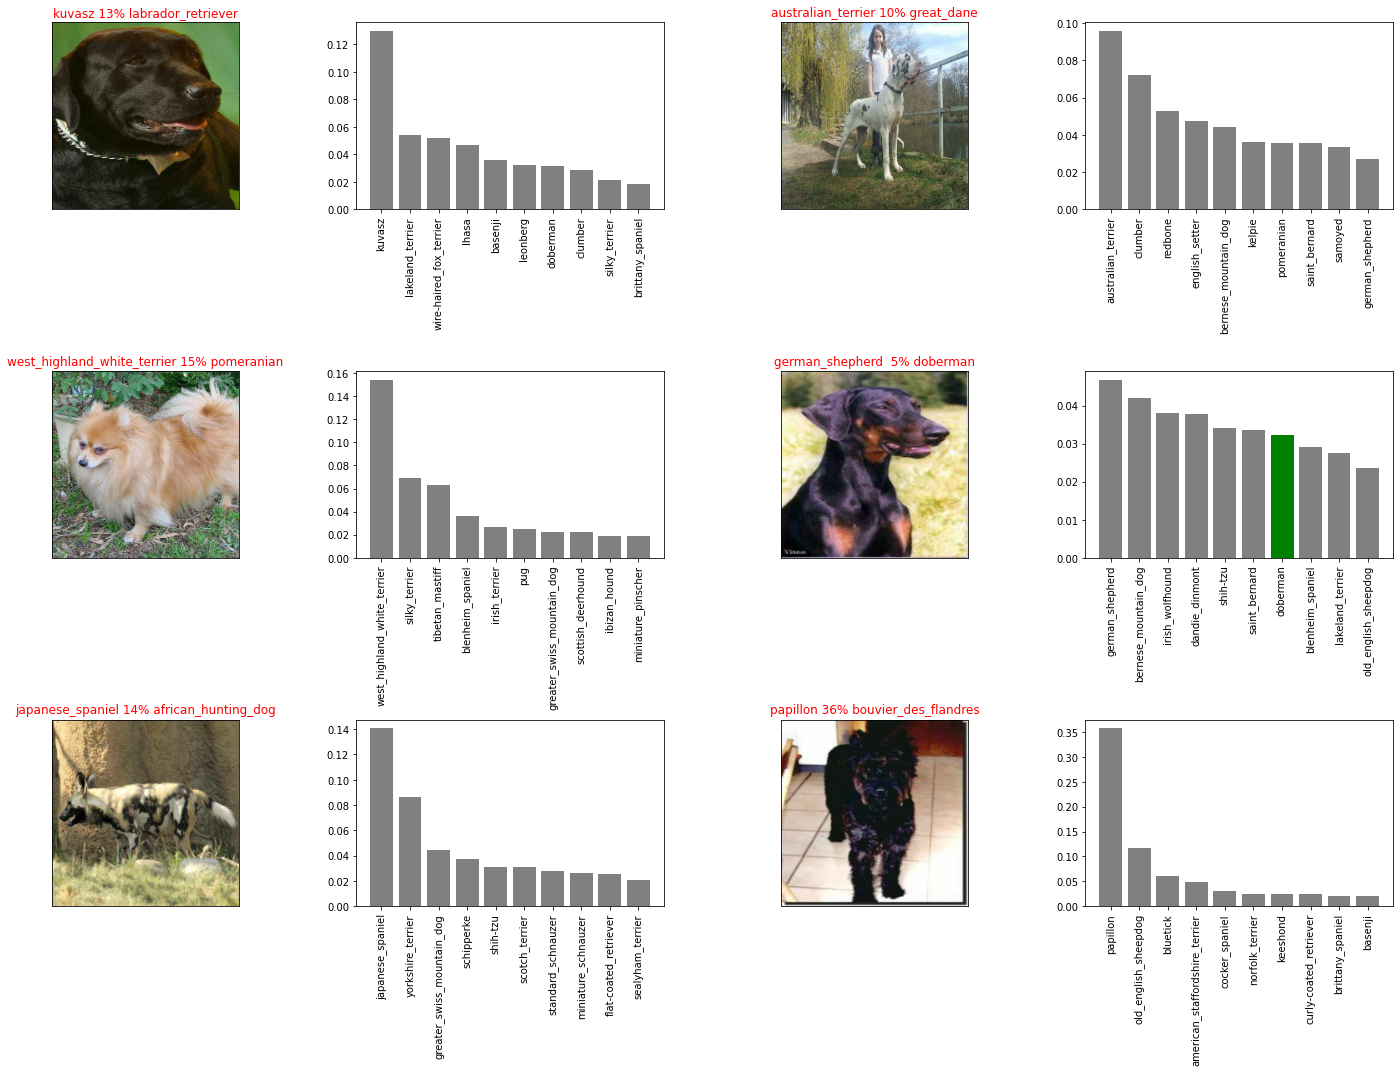

In [0]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# saving and reloading a trained model

In [0]:
# create a fucntion to save a model:

def save_model(model , suffix =None):


  modeldir = os.path.join('drive/My Drive/Dog Vision/models' , datetime.datetime.now().strftime('%Y%m%d - %H%M%S'))
  
  model_path = modeldir + '-' + suffix + '.h5'

  print('save model to...' , model_path)
  model.save(model_path)
  return model_path

In [0]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [0]:
# save our model trained on 1000 images

save_model(model , suffix = '1000-images-mobilenetv2-Adam')

save model to... drive/My Drive/Dog Vision/models/20200509 - 145928-1000-images-mobilenetv2-Adam.h5


'drive/My Drive/Dog Vision/models/20200509 - 145928-1000-images-mobilenetv2-Adam.h5'

In [0]:
# Load a trained model
loaded_1000_image_model = load_model('drive/My Drive/Dog Vision/models/20200509 - 060046-1000-images-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200509 - 060046-1000-images-mobilenetv2-Adam.h5


In [0]:
# evaluate the presaved model

model.evaluate(val_data)

7/7 [==============================] - 1s 120ms/step - loss: 5.6416 - accuracy: 0.0050


[5.641612529754639, 0.004999999888241291]

In [0]:
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 116ms/step - loss: 1.4145 - accuracy: 0.6100


[1.414453148841858, 0.6100000143051147]

# Training a big Dog model ( on the full dataset )

In [0]:
len(x) , len(y)

(10222, 10222)

In [0]:
# create a data batch with full dataset

full_data = create_data_batches(x , y)

creating training data batches...


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
# create a model as full model
full_model = create_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# create full model callbacks
full_model_tesnsorboard = create_tensorboard_callback()

full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy' , patience = 3)


In [0]:
# fit the full model on full data

#full_model.fit(x=full_data , epochs=NUM_EPOCHS , callbacks= [full_model_tesnsorboard,full_model_early_stopping])

In [0]:
save_model(full_model , suffix='full-image-set-mobilenetv2-Adam')

save model to... drive/My Drive/Dog Vision/models/20200509 - 145958-full-image-set-mobilenetv2-Adam.h5


'drive/My Drive/Dog Vision/models/20200509 - 145958-full-image-set-mobilenetv2-Adam.h5'

In [0]:
# load in the full model

loaded_full_model = load_model('drive/My Drive/Dog Vision/models/20200509 - 145958-full-image-set-mobilenetv2-Adam.h5')

Loading saved model from: drive/My Drive/Dog Vision/models/20200509 - 145958-full-image-set-mobilenetv2-Adam.h5


# make prediction on test data

In [0]:
# load test images filenames

test_path = 'drive/My Drive/Data/dog-breed-identification/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path) ]
test_filenames[:10]

['drive/My Drive/Data/dog-breed-identification/test/eb06356375888d41903fff14ef7c4104.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/f1dcabbeb1dbebb326a4b029b6f8b188.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/f57f8ce3fe1d928828e37a9bd78574d9.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/f30f7155fd94e7f0d3621d9cc9031e93.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/f3df185234b2be78825de1ba63d6c554.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/f16eed64196d24c423f0a68d7ebf287d.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/e959f03017afd7952e7635131387dd87.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/eec95c3af45f0072116b7b310fd53699.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/f14ba73b3323b3c7cfc3ba359a6c4313.jpg',
 'drive/My Drive/Data/dog-breed-identification/test/eb44625ed1113825fe1f23e50222cca1.jpg']

In [0]:
len(test_filenames)

10357

In [0]:
# create test data batches

test_data = create_data_batches(test_filenames , test_data = True)

creating test data batches...


In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [0]:
# make prediction on test data batche using the loaded full model

test_predictions = loaded_full_model.predict(test_data , verbose = 1)

 42/324 [==>...........................] - ETA: 2:11:51

KeyboardInterrupt: ignored

In [0]:
# save predictions (numpy array) to csv file
np.savetxt('drive/My Drive/Dog Vision/preds_array.csv', test_predictions , delimiter = ',')

NameError: ignored

In [0]:
# we intrept the above cell cause it takes a long to predcit all the test dataset

# Thank You